In [281]:
import pandas as pd 
# Python library for data manipulation and analysis

import matplotlib.pyplot as plt
# Python library for data visualization 

### **Objective:**
### Determine which United States National Park is the most biodiverse.

### **The following data comes from Kaggle:** 
### https://www.kaggle.com/datasets/nationalparkservice/park-biodiversity

In [282]:
# Read in 'parks' data and display first 5 rows

parks = pd.read_csv("biodiversity_data/biodiversity/parks.csv")
parks.head()

,Park Code,Park Name,State,Acres,Latitude,Longitude
0,ACAD,Acadia National Park,ME,47390,44.35,-68.21
1,ARCH,Arches National Park,UT,76519,38.68,-109.57
2,BADL,Badlands National Park,SD,242756,43.75,-102.50
3,BIBE,Big Bend National Park,TX,801163,29.25,-103.25
4,BISC,Biscayne National Park,FL,172924,25.65,-80.08


In [283]:
# Read in 'species' data and display first 5 rows

species = pd.read_csv("biodiversity_data/biodiversity/species.csv")
species.head()

/var/folders/6z/crdcrkjs435_1kj74q9jjkgh0000gn/T/ipykernel_5182/2477435331.py:3: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  species = pd.read_csv("biodiversity_data/biodiversity/species.csv")


,Species ID,Park Name,Category,Order,Family,Scientific Name,Common Names,Record Status,Occurrence,Nativeness,Abundance,Seasonality,Conservation Status,Unnamed: 13
0,ACAD-1000,Acadia National Park,Mammal,Artiodactyla,Cervidae,Alces alces,Moose,Approved,Present,Native,Rare,Resident,NaN,NaN
1,ACAD-1001,Acadia National Park,Mammal,Artiodactyla,Cervidae,Odocoileus virginianus,"Northern White-Tailed Deer, Virginia Deer, Whi...",Approved,Present,Native,Abundant,NaN,NaN,NaN
2,ACAD-1002,Acadia National Park,Mammal,Carnivora,Canidae,Canis latrans,"Coyote, Eastern Coyote",Approved,Present,Not Native,Common,NaN,Species of Concern,NaN
3,ACAD-1003,Acadia National Park,Mammal,Carnivora,Canidae,Canis lupus,"Eastern Timber Wolf, Gray Wolf, Timber Wolf",Approved,Not Confirmed,Native,NaN,NaN,Endangered,NaN
4,ACAD-1004,Acadia National Park,Mammal,Carnivora,Canidae,Vulpes vulpes,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...",Approved,Present,Unknown,Common,Breeder,NaN,NaN


In [284]:
# Data type adjustment

print(species.dtypes)

# Fix Dtype warning: "Columns (13) have mixed types"
# Cannot reference column names with special characters, must rename OR use bracket notation

species['Unnamed: 13'] = species['Unnamed: 13'].astype('object')

Species ID             object
Park Name              object
Category               object
Order                  object
Family                 object
Scientific Name        object
Common Names           object
Record Status          object
Occurrence             object
Nativeness             object
Abundance              object
Seasonality            object
Conservation Status    object
Unnamed: 13            object
dtype: object


In [285]:
# Combine datasets at common column 'Park Name' and display first 5 rows

parks = parks.set_index('Park Name')
species = species.set_index('Park Name')

species_in_parks = parks.join(species, lsuffix='_PRK', rsuffix='_SPC')
species_in_parks.head()

# join() combines based on index, concat() combines along an axis

,Park Code,State,Acres,Latitude,Longitude,Species ID,Category,Order,Family,Scientific Name,Common Names,Record Status,Occurrence,Nativeness,Abundance,Seasonality,Conservation Status,Unnamed: 13
Park Name,,,,,,,,,,,,,,,,,,
Acadia National Park,ACAD,ME,47390,44.35,-68.21,ACAD-1000,Mammal,Artiodactyla,Cervidae,Alces alces,Moose,Approved,Present,Native,Rare,Resident,NaN,NaN
Acadia National Park,ACAD,ME,47390,44.35,-68.21,ACAD-1001,Mammal,Artiodactyla,Cervidae,Odocoileus virginianus,"Northern White-Tailed Deer, Virginia Deer, Whi...",Approved,Present,Native,Abundant,NaN,NaN,NaN
Acadia National Park,ACAD,ME,47390,44.35,-68.21,ACAD-1002,Mammal,Carnivora,Canidae,Canis latrans,"Coyote, Eastern Coyote",Approved,Present,Not Native,Common,NaN,Species of Concern,NaN
Acadia National Park,ACAD,ME,47390,44.35,-68.21,ACAD-1003,Mammal,Carnivora,Canidae,Canis lupus,"Eastern Timber Wolf, Gray Wolf, Timber Wolf",Approved,Not Confirmed,Native,NaN,NaN,Endangered,NaN
Acadia National Park,ACAD,ME,47390,44.35,-68.21,ACAD-1004,Mammal,Carnivora,Canidae,Vulpes vulpes,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...",Approved,Present,Unknown,Common,Breeder,NaN,NaN


In [286]:
# Check DataFrame size

species_in_parks.shape

(119248, 18)

In [287]:
# Feature engineering 
# Split 'Scientific Name' into 'Genus' and 'Species'

species_in_parks[['Genus', 'Species']] = species_in_parks['Scientific Name'].str.split(' ', n=1, expand=True)

# str.split(' ') ensures that each string will be split wherever a space occurs
# n=1 specifies the maximum number of splits to perform
# expand=True ensures the split does not return a list 

# Display first 5 rows

species_in_parks.head()

,Park Code,State,Acres,Latitude,Longitude,Species ID,Category,Order,Family,Scientific Name,Common Names,Record Status,Occurrence,Nativeness,Abundance,Seasonality,Conservation Status,Unnamed: 13,Genus,Species
Park Name,,,,,,,,,,,,,,,,,,,,
Acadia National Park,ACAD,ME,47390,44.35,-68.21,ACAD-1000,Mammal,Artiodactyla,Cervidae,Alces alces,Moose,Approved,Present,Native,Rare,Resident,NaN,NaN,Alces,alces
Acadia National Park,ACAD,ME,47390,44.35,-68.21,ACAD-1001,Mammal,Artiodactyla,Cervidae,Odocoileus virginianus,"Northern White-Tailed Deer, Virginia Deer, Whi...",Approved,Present,Native,Abundant,NaN,NaN,NaN,Odocoileus,virginianus
Acadia National Park,ACAD,ME,47390,44.35,-68.21,ACAD-1002,Mammal,Carnivora,Canidae,Canis latrans,"Coyote, Eastern Coyote",Approved,Present,Not Native,Common,NaN,Species of Concern,NaN,Canis,latrans
Acadia National Park,ACAD,ME,47390,44.35,-68.21,ACAD-1003,Mammal,Carnivora,Canidae,Canis lupus,"Eastern Timber Wolf, Gray Wolf, Timber Wolf",Approved,Not Confirmed,Native,NaN,NaN,Endangered,NaN,Canis,lupus
Acadia National Park,ACAD,ME,47390,44.35,-68.21,ACAD-1004,Mammal,Carnivora,Canidae,Vulpes vulpes,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...",Approved,Present,Unknown,Common,Breeder,NaN,NaN,Vulpes,vulpes


In [288]:
# Drop unneeded columns and display first 5 rows of modified DataFrame

species_in_parks.drop(
    ['State',
     'Acres',
     'Latitude', 
     'Longitude', 
     'Species ID', 
     'Category', 
     'Order', 
     'Family', 
     'Record Status', 
     'Nativeness', 
     'Abundance', 
     'Seasonality',
     'Conservation Status', 
     'Unnamed: 13', 
     'Genus',
     'Species'],
     axis=1, inplace=True)

# axis=1 is columns, axis=0 is rows
# inplace=True modifies existing dataframe, inplace=False retruns new DataFrame

# Check size of resulting DataFrame and display first 5 rows

print(species_in_parks.shape)
species_in_parks.head()

(119248, 4)


,Park Code,Scientific Name,Common Names,Occurrence
Park Name,,,,
Acadia National Park,ACAD,Alces alces,Moose,Present
Acadia National Park,ACAD,Odocoileus virginianus,"Northern White-Tailed Deer, Virginia Deer, Whi...",Present
Acadia National Park,ACAD,Canis latrans,"Coyote, Eastern Coyote",Present
Acadia National Park,ACAD,Canis lupus,"Eastern Timber Wolf, Gray Wolf, Timber Wolf",Not Confirmed
Acadia National Park,ACAD,Vulpes vulpes,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...",Present


In [289]:
# Find missing values

print(species_in_parks.isnull().any())

# Handle missing values

species_in_parks.fillna("Unknown")

Park Code          False
Scientific Name    False
Common Names        True
Occurrence          True
dtype: bool


,Park Code,Scientific Name,Common Names,Occurrence
Park Name,,,,
Acadia National Park,ACAD,Alces alces,Moose,Present
Acadia National Park,ACAD,Odocoileus virginianus,"Northern White-Tailed Deer, Virginia Deer, Whi...",Present
Acadia National Park,ACAD,Canis latrans,"Coyote, Eastern Coyote",Present
Acadia National Park,ACAD,Canis lupus,"Eastern Timber Wolf, Gray Wolf, Timber Wolf",Not Confirmed
Acadia National Park,ACAD,Vulpes vulpes,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...",Present
...,...,...,...,...
Zion National Park,ZION,Solanum triflorum,Cut-Leaf Nightshade,Present
Zion National Park,ZION,Vitis arizonica,Canyon Grape,Present
Zion National Park,ZION,Vitis vinifera,Wine Grape,Present


In [290]:
# Remove any rows which ocurrence != 'Present'

species_in_parks = species_in_parks[species_in_parks['Occurrence'] == 'Present']

# Display first 5 rows

species_in_parks.head


<bound method NDFrame.head of                      Park Code         Scientific Name  \
Park Name                                                
Acadia National Park      ACAD             Alces alces   
Acadia National Park      ACAD  Odocoileus virginianus   
Acadia National Park      ACAD           Canis latrans   
Acadia National Park      ACAD           Vulpes vulpes   
Acadia National Park      ACAD        Lutra canadensis   
...                        ...                     ...   
Zion National Park        ZION       Solanum triflorum   
Zion National Park        ZION         Vitis arizonica   
Zion National Park        ZION          Vitis vinifera   
Zion National Park        ZION       Larrea tridentata   
Zion National Park        ZION     Tribulus terrestris   

                                                           Common Names  \
Park Name                                                                 
Acadia National Park                                             

count      56.000000
mean     1486.428571
std       751.060846
min       555.000000
25%       925.250000
50%      1299.000000
75%      1826.000000
max      3882.000000
Name: Scientific Name, dtype: float64
Park Code
GRSM    3882
YELL    3478
NOCA    3029
ROMO    2957
HAVO    2749
SHEN    2631
GRCA    2564
GLAC    2402
CONG    2097
HALE    2088
BIBE    2011
MACA    1941
YOSE    1905
CHIS    1847
SEKI    1819
GRTE    1800
EVER    1791
CUVA    1784
GUMO    1581
SAGU    1578
REDW    1537
WRST    1507
DEVA    1470
CAVE    1427
MORA    1378
OLYM    1367
BISC    1330
ZION    1317
PINN    1281
GLBA    1250
VOYA    1185
ACAD    1172
ISRO    1169
CARE    1163
CRLA    1122
MEVE    1112
WICA    1059
LAVO    1020
DENA    1002
LACL     982
GRBA     967
THRO     931
BADL     908
CANY     866
JOTR     862
GRSA     814
KATM     799
BRCA     790
ARCH     750
DRTO     745
PEFO     734
GAAR     722
BLCA     689
HOSP     680
KEFJ     644
KOVA     555
Name: Scientific Name, dtype: int64


Park Code
KOVA     555
KEFJ     644
HOSP     680
BLCA     689
GAAR     722
PEFO     734
DRTO     745
ARCH     750
BRCA     790
KATM     799
GRSA     814
JOTR     862
CANY     866
BADL     908
THRO     931
GRBA     967
LACL     982
DENA    1002
LAVO    1020
WICA    1059
MEVE    1112
CRLA    1122
CARE    1163
ISRO    1169
ACAD    1172
VOYA    1185
GLBA    1250
PINN    1281
ZION    1317
BISC    1330
OLYM    1367
MORA    1378
CAVE    1427
DEVA    1470
WRST    1507
REDW    1537
SAGU    1578
GUMO    1581
CUVA    1784
EVER    1791
GRTE    1800
SEKI    1819
CHIS    1847
YOSE    1905
MACA    1941
BIBE    2011
HALE    2088
CONG    2097
GLAC    2402
GRCA    2564
SHEN    2631
HAVO    2749
ROMO    2957
NOCA    3029
YELL    3478
GRSM    3882
Name: Scientific Name, dtype: int64

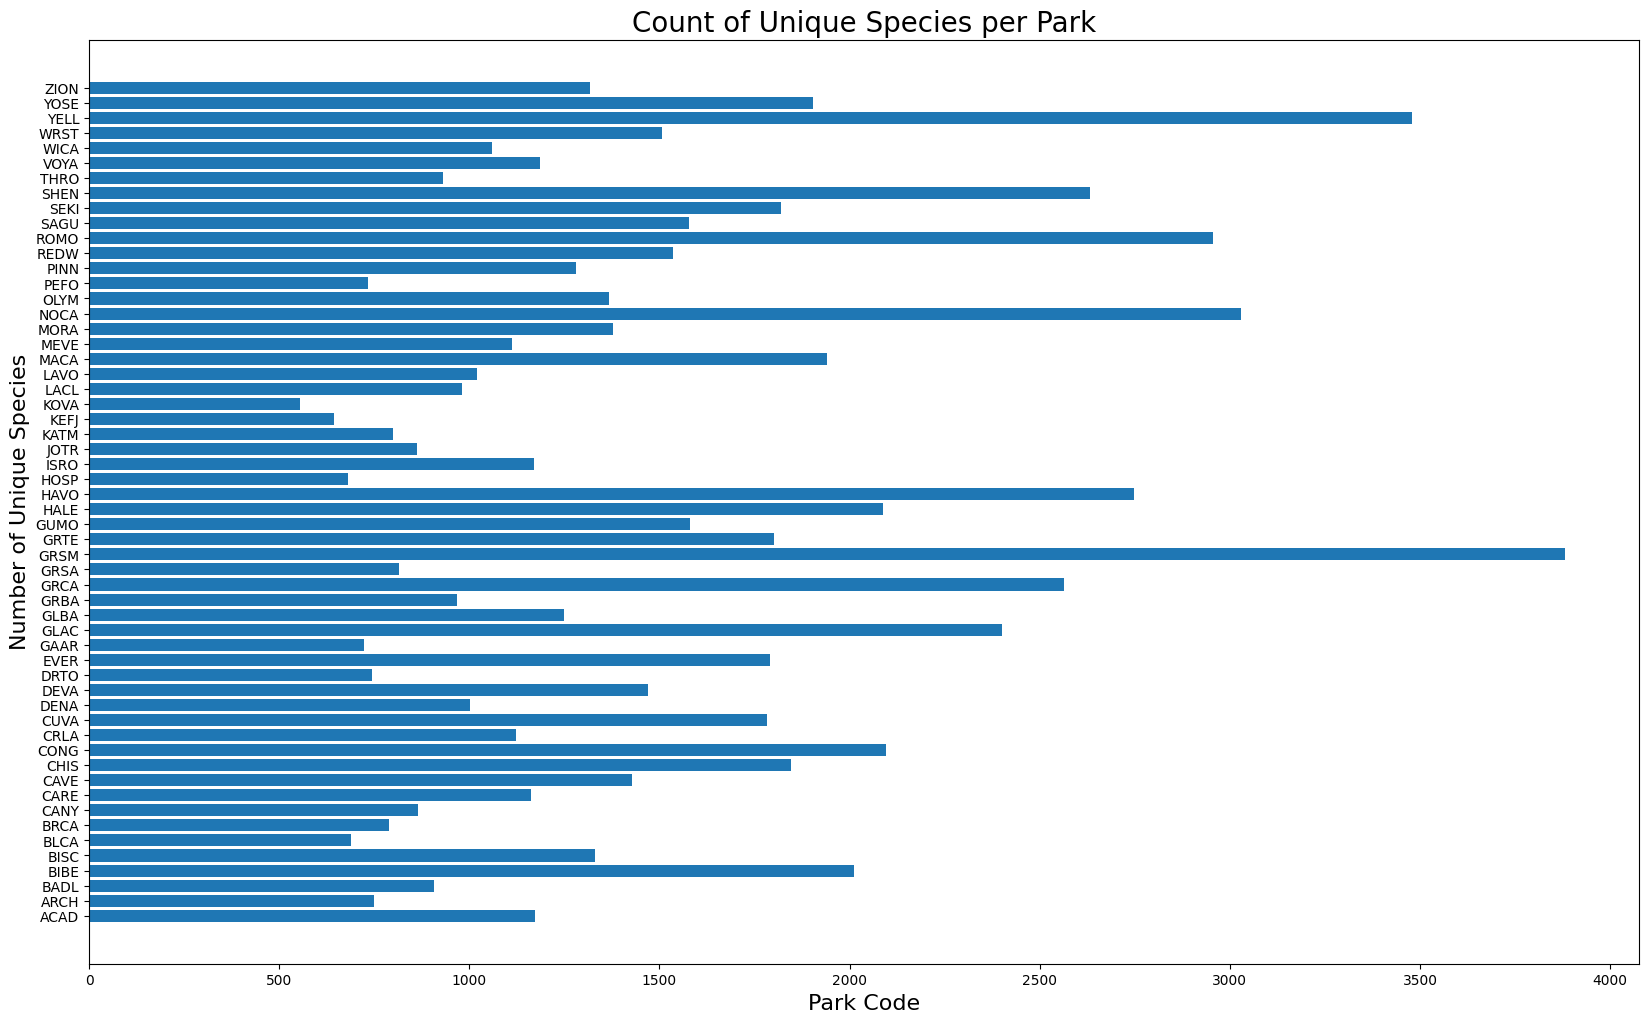

In [291]:
# Data visualization

species_counts = species_in_parks.groupby('Park Code')['Scientific Name'].nunique()

fig, ax = plt.subplots(figsize=(20, 12)) 
plt.barh(species_counts.index, species_counts.values)
plt.yticks(fontsize=10)
plt.title('Count of Unique Species per Park', fontsize=20)
plt.xlabel('Park Code', fontsize=16)
plt.ylabel('Number of Unique Species', fontsize=16)

# Descriptive Statistics

print(species_counts.describe())

print(species_counts.sort_values(ascending=False))

species_counts.sort_values(ascending=True)

### **Findings:**

### The 56 examined United States National Parks are home to an average of 1,486.43 species each. 

### Great Smokey Mountains (GRSM) National Park is the most biodiverse, with a total species count of 3,882. 

### Kobuk Valley National Park (KOVA) is the least biodiverse, with a total species count of 555.

### A standard deviation (std) of 751.06 indicates that there is significant variability in the data, with some values being much higher or lower than the mean.

### **Recommendations:**

### The same analysis could be done on a dataset of species counts in national parks from 10, 20, 30, etc. years ago and compared to this dataset to determine which national parks are losing species, and therefore biodiversity, at rapid rates.

### This dataset could be used to determine which national parks are home to the most amount endangered species which might influence conservation funding.

### This dataset could be used to determine in which national parks a certain species thrives and in which national parks it struggles to maintain a healthy population.

### **Summary:**

### By analyzing a dataset retrieved from Kaggle, I strived to determine which of the United States National Parks is the most biodiverse. 

### Using various methods of statistical analysis, I found that Great Smokey Mountains National Park (GRSM) is the most biodiverse of the 56 examined parks, with a total species count of 3,882. Kobuk Valley National Park (KOVA), conversely, is the least biodiverse with a total species count of 555. With a standard deviation of 751.06, it can be reasoned that the data is significantly variable, with some values being much higher or lower than the mean of   1,486.43

### This information can be used to drive further research. I recommend that the same analysis be done on datasets of species in national parks from years past to determine which parks are losing species rapidly. The dataset could also be used to determine whice national parks are home to the most amount of endangered species, which might influence the distribution of conservation funding. Another way that this dataset could be used is to determine in which parks a certain species thrives and in which parks it struggles to maintain a healthy population. 